<a href="https://colab.research.google.com/github/NEONITIN3/Maximize-It-hackerank/blob/master/PROJECT_WORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing*** ***Essential*** ***Libraries***

In [ ]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(11) 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import itertools

In [ ]:

import json
import math
import os
import cv2
from PIL import Image
import numpy as np
from keras import layers
from keras.applications import ResNet50,MobileNet, DenseNet201, InceptionV3, NASNetLarge, InceptionResNetV2, NASNetMobile
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools
%matplotlib inline

In [ ]:
import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import keras.applications.resnet
from keras import backend as K
import tensorflow as tf
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.wrappers.scikit_learn import KerasClassifier
from keras.applications.resnet50 import ResNet50
from keras import backend as K
import gc

# ***Loading*** ***Dataset***

In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

#LODING THE DATA FOLDER IN READ MODE

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/CANCER DATASET.zip", 'r')
zip_ref.extractall("/CANCER DATASET")
##zip_ref.close()

In [ ]:
folder_benign_train = '/CANCER DATASET/data/train/benign'
folder_malignant_train = '/CANCER DATASET/data/train/malignant'

folder_benign_test = '/CANCER DATASET/data/test/benign'
folder_malignant_test = '/CANCER DATASET/data/test/malignant'
read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))




# ***LOADING TRAIN TEST DATA***

#In this step I load in the pictures and turn them into numpy arrays using their RGB values. As the pictures have already been resized to 224x224, there's no need to resize them.

In [ ]:
# Load in training pictures 
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_train_benign = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_train_malignant = np.array(ims_malignant, dtype='uint8')

# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')


# ***SHOWING TRAINING DATA PIC IN 'UINT8'***

In [ ]:
X_train_benign

NameError: ignored

In [ ]:
X_train_malignant

array([[[[ 15,   3,   3],
         [ 17,   5,   7],
         [ 17,   7,   6],
         ...,
         [ 57,  28,  30],
         [ 55,  29,  28],
         [ 58,  30,  27]],

        [[ 15,   7,   5],
         [ 17,   7,   8],
         [ 16,   7,  10],
         ...,
         [ 52,  31,  30],
         [ 55,  29,  28],
         [ 55,  29,  28]],

        [[ 15,   5,   6],
         [ 17,   7,   6],
         [ 17,   8,   9],
         ...,
         [ 54,  28,  31],
         [ 53,  29,  29],
         [ 57,  29,  28]],

        ...,

        [[ 52,  27,  22],
         [ 53,  25,  21],
         [ 50,  26,  22],
         ...,
         [ 16,   6,   4],
         [ 16,   6,   4],
         [ 15,   6,   1]],

        [[ 51,  27,  23],
         [ 53,  25,  22],
         [ 54,  26,  23],
         ...,
         [ 16,   4,   4],
         [ 15,   5,   3],
         [ 15,   5,   4]],

        [[ 52,  27,  23],
         [ 52,  27,  23],
         [ 53,  25,  22],
         ...,
         [ 16,   4,   4],
        

# ***SHOWING TESTING DATA PIC IN 'UINT8'***

In [ ]:
X_benign_test

array([[[[215, 126, 144],
         [214, 127, 146],
         [213, 124, 144],
         ...,
         [222, 145, 165],
         [219, 140, 161],
         [221, 139, 161]],

        [[217, 128, 146],
         [215, 131, 147],
         [216, 130, 143],
         ...,
         [223, 142, 161],
         [221, 140, 159],
         [217, 140, 156]],

        [[219, 128, 146],
         [219, 132, 148],
         [220, 134, 147],
         ...,
         [218, 141, 159],
         [218, 141, 157],
         [219, 145, 162]],

        ...,

        [[212, 149, 157],
         [211, 149, 150],
         [212, 148, 149],
         ...,
         [204, 138, 150],
         [204, 141, 150],
         [206, 145, 152]],

        [[209, 147, 152],
         [212, 150, 153],
         [215, 150, 154],
         ...,
         [205, 143, 148],
         [205, 142, 150],
         [206, 143, 151]],

        [[211, 145, 149],
         [215, 149, 153],
         [215, 148, 155],
         ...,
         [204, 141, 149],
        

In [ ]:
X_malignant_test

array([[[[146, 117, 119],
         [197, 167, 169],
         [191, 157, 158],
         ...,
         [210, 160, 159],
         [214, 164, 165],
         [211, 165, 168]],

        [[194, 164, 164],
         [201, 166, 170],
         [201, 162, 167],
         ...,
         [208, 160, 160],
         [209, 163, 165],
         [209, 164, 167]],

        [[199, 165, 166],
         [199, 160, 165],
         [215, 172, 179],
         ...,
         [214, 168, 171],
         [212, 166, 169],
         [213, 168, 171]],

        ...,

        [[219, 190, 194],
         [220, 191, 196],
         [220, 191, 196],
         ...,
         [214, 176, 175],
         [210, 175, 173],
         [203, 168, 166]],

        [[191, 172, 176],
         [223, 201, 204],
         [217, 188, 190],
         ...,
         [210, 176, 174],
         [211, 177, 175],
         [195, 161, 160]],

        [[ 66,  54,  58],
         [205, 185, 187],
         [221, 192, 194],
         ...,
         [206, 175, 173],
        

# ***CREATING*** ***LABEL***

In [ ]:
y_train_benign = np.zeros(X_train_benign.shape[0])
y_train_malignant = np.ones(X_train_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

# ***Y TRAIN AND TEST DATA OF (benign malignant) WITH LABELS***

In [ ]:
y_train_benign

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y_train_malignant

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
y_benign_test 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
y_malignant_test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

# ***MERGING  ALL THE TRAIN AND TEST DATA TOGETHER***

## *1*. ***TRAIN DATA OF X AND Y*** 

In [ ]:
X_train = np.concatenate((X_train_benign, X_train_malignant), axis = 0)
Y_train = np.concatenate((y_train_benign, y_train_malignant), axis = 0)

## *2*. ***TEST DATA OF X AND Y*** 

In [ ]:
X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
Y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

# ***shape of train and test data***

In [ ]:
print(X_train.shape)


(2637, 224, 224, 3)


In [ ]:
print(X_test.shape)

(660, 224, 224, 3)


In [ ]:
print(Y_train.shape)

(2637,)


In [ ]:
print(Y_test.shape)

(660,)


In [ ]:
X_train

array([[[[212, 182, 190],
         [213, 183, 191],
         [212, 182, 192],
         ...,
         [202, 177, 183],
         [200, 173, 180],
         [198, 173, 179]],

        [[211, 180, 186],
         [214, 183, 191],
         [211, 180, 188],
         ...,
         [200, 173, 180],
         [198, 171, 178],
         [198, 171, 180]],

        [[212, 181, 187],
         [214, 184, 192],
         [211, 180, 188],
         ...,
         [199, 172, 179],
         [199, 172, 179],
         [199, 172, 179]],

        ...,

        [[204, 171, 178],
         [207, 176, 181],
         [206, 180, 183],
         ...,
         [196, 164, 177],
         [194, 163, 171],
         [196, 163, 172]],

        [[202, 171, 177],
         [207, 176, 181],
         [207, 178, 183],
         ...,
         [193, 161, 172],
         [194, 165, 170],
         [193, 162, 170]],

        [[203, 171, 176],
         [204, 175, 180],
         [202, 177, 183],
         ...,
         [194, 161, 172],
        

In [ ]:
Y_train

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
X_test

array([[[[215, 126, 144],
         [214, 127, 146],
         [213, 124, 144],
         ...,
         [222, 145, 165],
         [219, 140, 161],
         [221, 139, 161]],

        [[217, 128, 146],
         [215, 131, 147],
         [216, 130, 143],
         ...,
         [223, 142, 161],
         [221, 140, 159],
         [217, 140, 156]],

        [[219, 128, 146],
         [219, 132, 148],
         [220, 134, 147],
         ...,
         [218, 141, 159],
         [218, 141, 157],
         [219, 145, 162]],

        ...,

        [[212, 149, 157],
         [211, 149, 150],
         [212, 148, 149],
         ...,
         [204, 138, 150],
         [204, 141, 150],
         [206, 145, 152]],

        [[209, 147, 152],
         [212, 150, 153],
         [215, 150, 154],
         ...,
         [205, 143, 148],
         [205, 142, 150],
         [206, 143, 151]],

        [[211, 145, 149],
         [215, 149, 153],
         [215, 148, 155],
         ...,
         [204, 141, 149],
        

In [ ]:
Y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# ***Shuffle data***
#  As the pictures do not have any labels, and we created the label. Finally, the pictures are added together to a big training set and shuffeled.

In [ ]:
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
Y_test = Y_test[s]

# ***some sample of image and its classification***

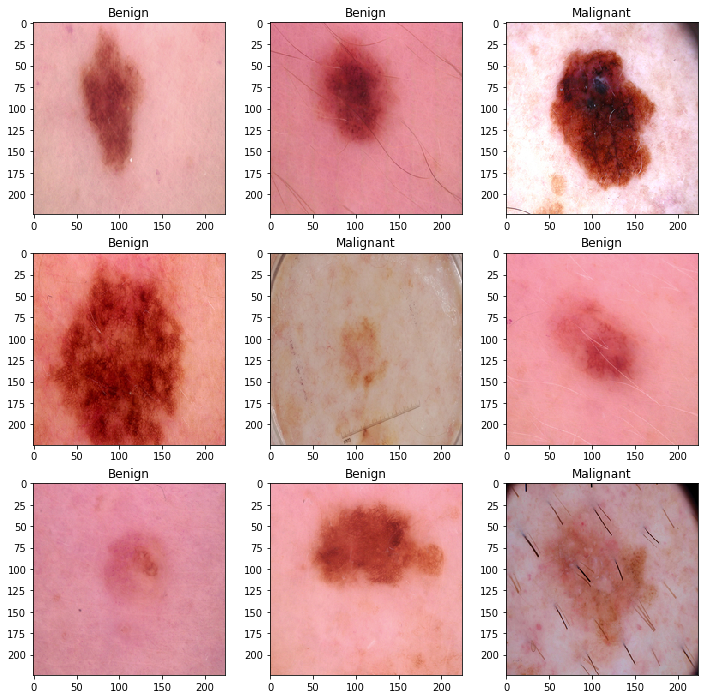

In [ ]:
# Display first 15 images of moles, and how they are classified
w=60
h=40
fig=plt.figure(figsize=(12, 12))
columns = 3
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if Y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

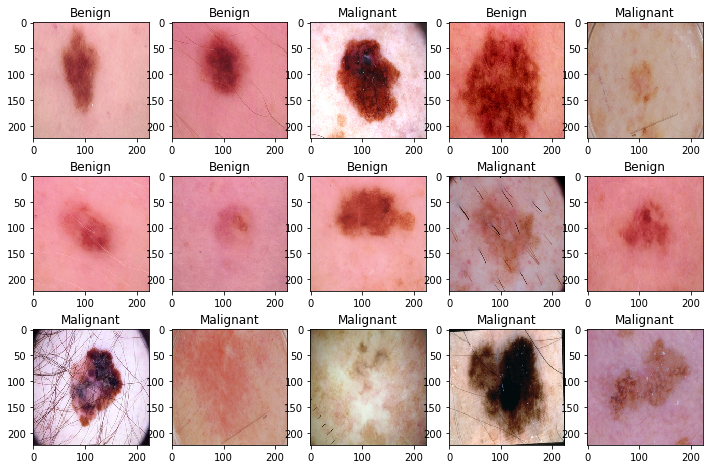

In [ ]:
# Display first 15 images of moles, and how they are classified
w=50
h=50
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if Y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()



# ***Categorial labels***



***apply one hot encoding on label data***

In [ ]:
Y_train = to_categorical(Y_train, num_classes= 2)
Y_test = to_categorical(Y_test, num_classes= 2)

# ***Normalization***

* Normalize all Values of the pictures by dividing all the RGB values by 255*

In [ ]:
# With data augmentation to prevent overfitting 
X_train = X_train/255.
X_test = X_test/255

# **data** *`generator`*(***augomentation***)

In [ ]:

BATCH_SIZE = 64

train_generator = ImageDataGenerator(
        zoom_range=2, 
        rotation_range = 90,
        horizontal_flip=True, 
        vertical_flip=True, 
    )


# Model: ResNet50

In [ ]:
# See learning curve and validation curve

def build(input_shape= (224,224,3), lr = 1e-3, num_classes= 2,
          init= 'normal', activ= 'relu', optim= 'adam'):
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',input_shape=input_shape,
                     activation= activ, kernel_initializer='glorot_uniform'))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same', 
                     activation =activ, kernel_initializer = 'glorot_uniform'))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer=init))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()

    if optim == 'rmsprop':
        optimizer = RMSprop(lr=lr)

    else:
        optimizer = Adam(lr=lr)

    model.compile(optimizer = optimizer ,loss = "binary_crossentropy", metrics=["accuracy"])
    return model

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-7)

NameError: ignored

In [ ]:
input_shape = (224,224,3)
lr = 1e-5
epochs = 50
batch_size = 64

model = ResNet50(include_top=True,
                 weights= None,
                 input_tensor=None,
                 input_shape=input_shape,
                 pooling='avg',
                 classes=2)

model.compile(optimizer = Adam(lr) ,
              loss = "binary_crossentropy", 
              metrics=["accuracy"])

history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs= epochs, batch_size= batch_size, verbose=2, 
                    callbacks=[learning_rate_reduction]
                   )

# list all data in history
print(history.history.keys())

NameError: ignored